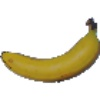

In [57]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

import os
import PIL

import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_dir = pathlib.Path("train/train")

image_count = len(list(data_dir.glob('*/*.jpg')))

apricot = list(data_dir.glob('Banana/*'))
PIL.Image.open(str(apricot[0]))

In [1]:
from pathlib import Path
from PIL import Image

# Ruta al directorio principal que contiene subdirectorios por categoría
data_dir = Path("train/train")

# Lista de categorías
categories = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']

# Iterar sobre cada categoría y mostrar una imagen de cada una
for category in categories:
    image_paths = list(data_dir.glob(f'{category}/*'))
    if image_paths:
        image_path = image_paths[0]
        image = Image.open(str(image_path))
        image.show()


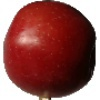

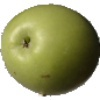

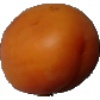

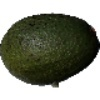

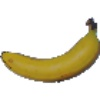

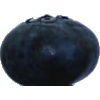

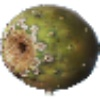

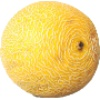

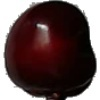

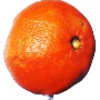

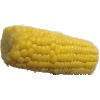

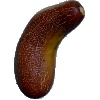

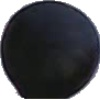

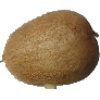

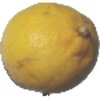

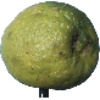

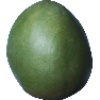

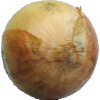

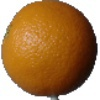

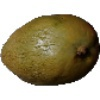

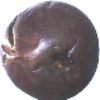

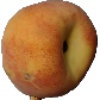

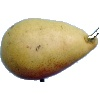

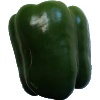

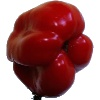

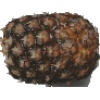

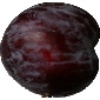

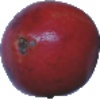

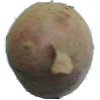

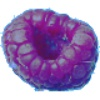

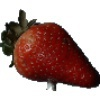

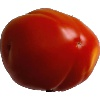

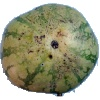

<Figure size 1500x2000 with 0 Axes>

In [4]:
from pathlib import Path
from PIL import Image
from IPython.display import display

# Ruta al directorio principal que contiene subdirectorios por categoría
data_dir = Path("train/train")

# Lista de categorías
categories = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']

plt.figure(figsize=(15, 20))

    
# Iterar sobre cada categoría y mostrar una imagen de cada una
for category in categories:
    image_paths = list(data_dir.glob(f'{category}/*'))
    if image_paths:
        image_path = image_paths[0]
        image = Image.open(str(image_path))
        display(image)


In [2]:
# creating batches
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 16854 files belonging to 33 classes.
Using 13484 files for training.
Found 16854 files belonging to 33 classes.
Using 3370 files for validation.
['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']


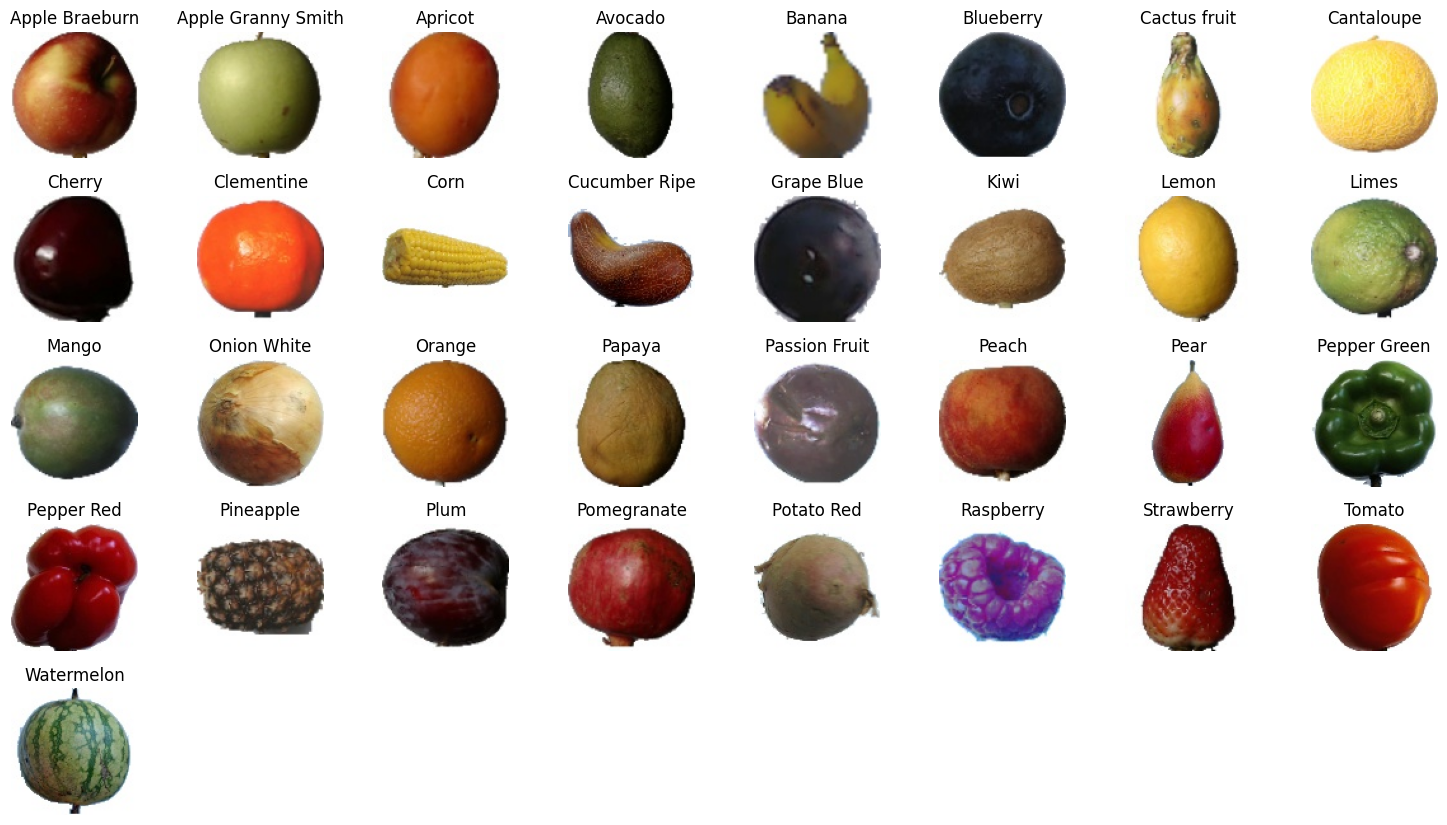

In [1]:
import os
import random
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

# Ruta al directorio principal que contiene subdirectorios por categoría
train_path = Path("train/train")
class_names = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon'] # Lista completa de nombres de clases

plt.figure(figsize=(15, 10))

for i, class_name in enumerate(class_names):
    plt.subplot(6, 8, i + 1)
    
    # Obtener la ruta de una imagen aleatoria en la clase actual
    class_dir = train_path / class_name
    image_paths = list(class_dir.glob('*.jpg'))
    random_image_path = random.choice(image_paths)
    
    # Abrir y mostrar la imagen
    img = Image.open(str(random_image_path))
    plt.imshow(img)
    
    # Mostrar el nombre de la clase como título
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [4]:
num_classes = 33

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomFlip("horizontal"),
    layers.RandomTranslation(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2), fill_mode="reflect"),
    layers.RandomRotation(factor=(-0.2, 0.2)),
    #layers.RandomZoom(height_factor=(-0.4, -0.2),  width_factor=(-0.4, -0.2)),
    layers.RandomContrast(factor=[1.0, 3.0], seed=123 )
    
  ]
)


input_shape = (1, 180, 180, 3)
x = tf.random.normal(input_shape)
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])


In [16]:
import tensorflow as tf

optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.0005,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                      

In [18]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/10
422/422 [==============================] - 709s 2s/step - loss: 2.4325 - accuracy: 0.2684 - val_loss: 1.9346 - val_accuracy: 0.4119
Epoch 2/10
422/422 [==============================] - 667s 2s/step - loss: 1.4951 - accuracy: 0.5105 - val_loss: 1.3826 - val_accuracy: 0.4739
Epoch 3/10
422/422 [==============================] - 668s 2s/step - loss: 1.0989 - accuracy: 0.6327 - val_loss: 1.1827 - val_accuracy: 0.5872
Epoch 4/10
422/422 [==============================] - 658s 2s/step - loss: 0.8891 - accuracy: 0.6969 - val_loss: 1.1720 - val_accuracy: 0.6223
Epoch 5/10
422/422 [==============================] - 507s 1s/step - loss: 0.7519 - accuracy: 0.7455 - val_loss: 1.4125 - val_accuracy: 0.5347
Epoch 6/10
422/422 [==============================] - 520s 1s/step - loss: 0.6598 - accuracy: 0.7730 - val_loss: 1.0191 - val_accuracy: 0.6110
Epoch 7/10
422/422 [==============================] - 471s 1s/step - loss: 0.6016 - accuracy: 0.7981 - val_loss: 1.2506 - val_accuracy: 0.5772

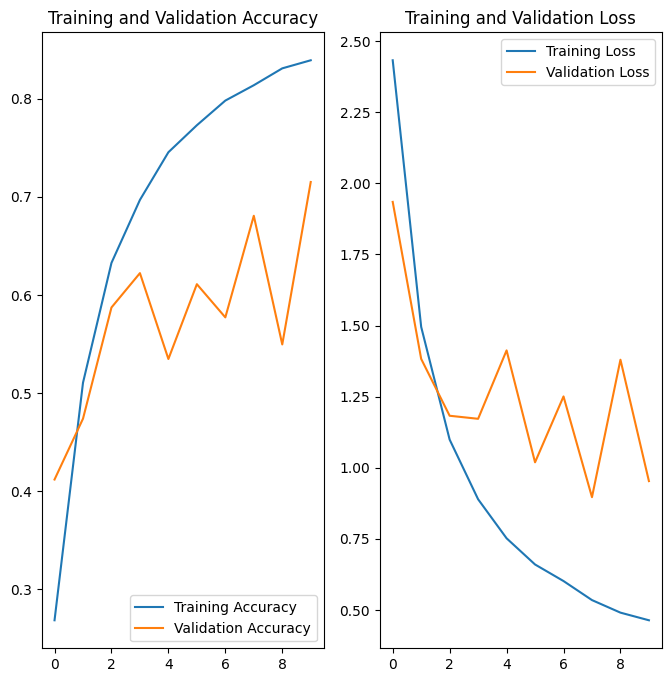

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 51ms/step
Lo más probable es que esta imagen pertenezca  Pepper Red  83.94 con un porcentaje de confianza.


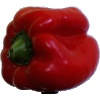

In [63]:
sample_path = pathlib.Path("test/test/0083.jpg")

img = tf.keras.utils.load_img(
    sample_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 


predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Lo más probable es que esta imagen pertenezca  {}  {:.2f} con un porcentaje de confianza."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


PIL.Image.open(sample_path)

1/1 [==============================] - 0s 41ms/step
Lo más probable es que esta imagen pertenezca  Grape Blue  98.22 con un porcentaje de confianza.


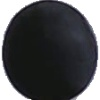

In [64]:
sample_path = pathlib.Path("test/test/0001.jpg")

img = tf.keras.utils.load_img(
    sample_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 


predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Lo más probable es que esta imagen pertenezca  {}  {:.2f} con un porcentaje de confianza."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(sample_path)